In [1]:
import numpy as np
import MDP
import RL2
from Utils2 import print_policy_word, check_stochastic_policy_terminate,\
    generate_data_for_plot, plot_avg_cumulative_reward, check_stochastic_policy_in_pit

%matplotlib inline


''' Construct a simple maze MDP

  Grid world layout:

  ---------------------
  |  0 |  1 |  2 |  3 |
  ---------------------
  |  4 |  5 |  6 |  7 |
  ---------------------
  |  8 |  9 | 10 | 11 |
  ---------------------
  | 12 | 13 | 14 | 15 |
  ---------------------

  Goal state: 15
  Bad state: 9
  End state: 16

  The end state is an absorbing state that the agent transitions
  to after visiting the goal state.

  There are 17 states in total (including the end state)
  and 4 actions (up, down, left, right).'''

# Transition function: |A| x |S| x |S'| array
T = np.zeros([4,17,17])
a = 0.8;  # intended move
b = 0.1;  # lateral move

# up (a = 0)

T[0,0,0] = a+b;
T[0,0,1] = b;

T[0,1,0] = b;
T[0,1,1] = a;
T[0,1,2] = b;

T[0,2,1] = b;
T[0,2,2] = a;
T[0,2,3] = b;

T[0,3,2] = b;
T[0,3,3] = a+b;

T[0,4,4] = b;
T[0,4,0] = a;
T[0,4,5] = b;

T[0,5,4] = b;
T[0,5,1] = a;
T[0,5,6] = b;

T[0,6,5] = b;
T[0,6,2] = a;
T[0,6,7] = b;

T[0,7,6] = b;
T[0,7,3] = a;
T[0,7,7] = b;

T[0,8,8] = b;
T[0,8,4] = a;
T[0,8,9] = b;

T[0,9,8] = b;
T[0,9,5] = a;
T[0,9,10] = b;

T[0,10,9] = b;
T[0,10,6] = a;
T[0,10,11] = b;

T[0,11,10] = b;
T[0,11,7] = a;
T[0,11,11] = b;

T[0,12,12] = b;
T[0,12,8] = a;
T[0,12,13] = b;

T[0,13,12] = b;
T[0,13,9] = a;
T[0,13,14] = b;

T[0,14,13] = b;
T[0,14,10] = a;
T[0,14,15] = b;

T[0,15,16] = 1;
T[0,16,16] = 1;

# down (a = 1)

T[1,0,0] = b;
T[1,0,4] = a;
T[1,0,1] = b;

T[1,1,0] = b;
T[1,1,5] = a;
T[1,1,2] = b;

T[1,2,1] = b;
T[1,2,6] = a;
T[1,2,3] = b;

T[1,3,2] = b;
T[1,3,7] = a;
T[1,3,3] = b;

T[1,4,4] = b;
T[1,4,8] = a;
T[1,4,5] = b;

T[1,5,4] = b;
T[1,5,9] = a;
T[1,5,6] = b;

T[1,6,5] = b;
T[1,6,10] = a;
T[1,6,7] = b;

T[1,7,6] = b;
T[1,7,11] = a;
T[1,7,7] = b;

T[1,8,8] = b;
T[1,8,12] = a;
T[1,8,9] = b;

T[1,9,8] = b;
T[1,9,13] = a;
T[1,9,10] = b;

T[1,10,9] = b;
T[1,10,14] = a;
T[1,10,11] = b;

T[1,11,10] = b;
T[1,11,15] = a;
T[1,11,11] = b;

T[1,12,12] = a+b;
T[1,12,13] = b;

T[1,13,12] = b;
T[1,13,13] = a;
T[1,13,14] = b;

T[1,14,13] = b;
T[1,14,14] = a;
T[1,14,15] = b;

T[1,15,16] = 1;
T[1,16,16] = 1;

# left (a = 2)

T[2,0,0] = a+b;
T[2,0,4] = b;

T[2,1,1] = b;
T[2,1,0] = a;
T[2,1,5] = b;

T[2,2,2] = b;
T[2,2,1] = a;
T[2,2,6] = b;

T[2,3,3] = b;
T[2,3,2] = a;
T[2,3,7] = b;

T[2,4,0] = b;
T[2,4,4] = a;
T[2,4,8] = b;

T[2,5,1] = b;
T[2,5,4] = a;
T[2,5,9] = b;

T[2,6,2] = b;
T[2,6,5] = a;
T[2,6,10] = b;

T[2,7,3] = b;
T[2,7,6] = a;
T[2,7,11] = b;

T[2,8,4] = b;
T[2,8,8] = a;
T[2,8,12] = b;

T[2,9,5] = b;
T[2,9,8] = a;
T[2,9,13] = b;

T[2,10,6] = b;
T[2,10,9] = a;
T[2,10,14] = b;

T[2,11,7] = b;
T[2,11,10] = a;
T[2,11,15] = b;

T[2,12,8] = b;
T[2,12,12] = a+b;

T[2,13,9] = b;
T[2,13,12] = a;
T[2,13,13] = b;

T[2,14,10] = b;
T[2,14,13] = a;
T[2,14,14] = b;

T[2,15,16] = 1;
T[2,16,16] = 1;

# right (a = 3)

T[3,0,0] = b;
T[3,0,1] = a;
T[3,0,4] = b;

T[3,1,1] = b;
T[3,1,2] = a;
T[3,1,5] = b;

T[3,2,2] = b;
T[3,2,3] = a;
T[3,2,6] = b;

T[3,3,3] = a+b;
T[3,3,7] = b;

T[3,4,0] = b;
T[3,4,5] = a;
T[3,4,8] = b;

T[3,5,1] = b;
T[3,5,6] = a;
T[3,5,9] = b;

T[3,6,2] = b;
T[3,6,7] = a;
T[3,6,10] = b;

T[3,7,3] = b;
T[3,7,7] = a;
T[3,7,11] = b;

T[3,8,4] = b;
T[3,8,9] = a;
T[3,8,12] = b;

T[3,9,5] = b;
T[3,9,10] = a;
T[3,9,13] = b;

T[3,10,6] = b;
T[3,10,11] = a;
T[3,10,14] = b;

T[3,11,7] = b;
T[3,11,11] = a;
T[3,11,15] = b;

T[3,12,8] = b;
T[3,12,13] = a;
T[3,12,12] = b;

T[3,13,9] = b;
T[3,13,14] = a;
T[3,13,13] = b;

T[3,14,10] = b;
T[3,14,15] = a;
T[3,14,14] = b;

T[3,15,16] = 1;
T[3,16,16] = 1;

# Reward function: |A| x |S| array
R = -1 * np.ones([4,17]);

# set rewards
R[:,15] = 100;  # goal state
R[:,9] = -70;   # bad state
R[:,16] = 0;    # end state

# Discount factor: scalar in [0,1)
discount = 0.95

# MDP object
mdp = MDP.MDP(T,R,discount)

# RL problem
rlProblem = RL2.RL2(mdp,np.random.normal)

## Question 1: REINFORCE

The following cell shows the result of running the REINFORCE algorithm on MAZE Environment. The disucssion of results can be found after the results cell.

In [2]:
# Test REINFORCE
policyParams, policy = rlProblem.reinforce(
    s0=0,initialPolicyParams=np.random.rand(mdp.nActions,mdp.nStates),
    nEpisodes=200,nSteps=100, constant_lr=0.002)
print ("\nREINFORCE results")
print (policy)
print ("rounded policy: \n{}".format(np.round(policy, decimals=1)))
argmax_policy = np.argmax(policy, axis=0)
print ("argmax policy: \n{}".format(argmax_policy))
print_policy_word(argmax_policy, rlProblem, s0=0, nSteps=100)
#Note the previous function call only checks if the argmax policy will terminate
#Check over 100 trials if current stochastic policy will terminate
check_stochastic_policy_terminate(policy, rlProblem, s0=0, nSteps=100, nTrials=100)
check_stochastic_policy_in_pit(policy, rlProblem, s0=0, nSteps=100, nTrials=100)
print ("last 10 episode rewards: {}".format(rlProblem.get_reinforce_cumulative_reward()[-10:]))


REINFORCE results
[[  3.28618337e-01   8.92069620e-02   9.95973594e-01   5.12245430e-04
    3.01156467e-01   2.55513028e-01   4.78817926e-02   1.21881126e-08
    2.07455508e-01   2.44254838e-01   2.85880772e-02   2.03662157e-05
    1.50574030e-01   8.64526944e-02   1.62428538e-01   2.62453645e-02
    1.61447430e-01]
 [  3.77744563e-02   3.24294924e-02   3.48551756e-03   1.66120833e-04
    1.13493401e-01   6.45388008e-02   5.24354695e-02   3.96505563e-08
    3.15167390e-01   2.62903601e-01   2.09318481e-02   9.99938299e-01
    2.60373363e-01   9.49390670e-02   1.21122182e-01   8.72304779e-01
    3.22028078e-01]
 [  2.49158648e-01   4.71031988e-02   3.13055839e-04   2.34949829e-04
    4.09225998e-01   9.14234522e-02   2.04225012e-02   6.10905079e-09
    3.63676403e-01   1.38350800e-01   1.13625368e-02   2.01283202e-05
    2.82815493e-01   1.64890709e-01   1.38901997e-01   4.96977996e-02
    3.45681080e-01]
 [  3.84448559e-01   8.31260347e-01   2.27832172e-04   9.99086684e-01
    1.76124

The above cell shows the qualitative results for REINFORCE algorithm. The first output matrix is the stochastic policy $(|A|x|S|)$ and shows the probability of picking an action when in a certain state. The `rounded policy` results show the policy rounded to 1 decimal place. The `argmax policy` generates a deterministic policy based on maximum probability for evaluation of goodness criteria. The following describes the qualitative result tools:
* TERMINATE: function checks if the final policy generated by Q-learning terminates at box 15/16 and receive final reward of 100
* GOODNESS: function checks if the final policy generated by Q-learning is good. This is hard-goodness which checks for actions at each state and they must align with the direction of the terminal state (15,16) and away from the pit state (9). (Not a good qualitative measure of policy).
* SOFT_GOODNESS: function checks if the final policy avoids falling in the pit state (9)

We see that argmax deterministic policy is able to terminate in 18 steps and achieve a `soft goodness`. This means that the REINFORCE algorithm is able to learn to avoid the pit and the argmax policy of states surrounding the pit is generating action away from the pit with higher probability. The algorithm however doesnot achieve `hard goodness` which is understandable as the algorithm relies on numerical optimization and uses approximations of value of state and thus is not able to achieve the best optimum solution in 200 episodes. The `hard goodness` requires every action to point towards the goal, which requires full environment information. Thus without the exact transition matrix and value function of the environment, it becomes difficult to achieve `hard goodness`.

Next we analyze the stochastic policy. The `Number of terminations of stcohastic policy` term shows the number of times the final stochastic policy is able to terminate in the Maze environment out of 100 trials. We see that the policy terminates 97/100 times. The `Number of visits to pit of stcohastic policy` term shows how many times do we visit the pit in 100 entries. We visit the pit 9 times out of 100. These values are encouraging and show that the stochastic policy generated from optimization of policy parameters is able to learn to avoid the pit and reach the final state to get a reward of $100$. The small probabilities of bad actions can lead the policy in a ditch and in directions away from the terminal state. However, we see from the argmax of stochastic policy, that the highest probabilities are associated with the best actions.

## Question 1: Model Based RL

The following cell shows the result of Model Based RL in Maze Environment. The model based RL algorithm produces a deterministic policy and thus we produce qualitative results to evaluate the policy. The value of $epsilon=0.3$ as the default value which was provided, but we change it to $epsilon=0.05$ for the graph (as expressed by change on Piazza). The first matrix in the following cell shows the value of each state. We see a large positive value for every cell, other than state (9) which is the pit with a reward of $-70$. The following result is the deterministic policy generated by model based RL. The policy is expressed in words in the next line and shows that the policy is mostly correct (`hard goodness`) other than in states $[12, 13, 14]$. The policy takes the minimum number of steps to terminate, $6$ and achieves a high total reward. The policy always terminates and never turns towards the pit `soft goodness`. The results show that model based RL (which esstimates the model/transition matrix of the environment) is nearly as good as value/modified-policy iteration (except requires more samples to learn). This is obvious as the model based RL uses value iteration to converge to optimal value function and extract policy from it. However, the model based RL uses sample approximation to find the transition matrix (which is readily available in value/modified-policy iteration) and thus requires samples to converge and thus slower than value iteration.

In [3]:
# Test model-based RL
[V,policy] = rlProblem.modelBasedRL(
    s0=0,defaultT=np.ones([mdp.nActions,mdp.nStates,mdp.nStates])/mdp.nStates,
    initialR=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=0.3)
print ("\nmodel-based RL results")
print (V)
print (policy)
print_policy_word(policy, rlProblem, s0=0, nSteps=100)


model-based RL results
[  60.97990448   66.25714466   71.89700214   77.08292386   59.46486935
   66.84825806   77.28745089   83.85469694   55.02797045   -1.67412976
   82.97805681   91.64078149   50.38681612   47.07647265   76.53550139
  100.30077635    0.24407489]
[3 3 3 1 3 3 3 1 0 3 3 1 0 2 0 1 0]
TERMINATE: True, GOODNESS: False, SOFT_GOODNESS: True
bad states: [12, 13, 14], Total Reward: 95.02726914273156, Total Steps to terminate: 6
['0:right', '1:right', '2:right', '3:down', '4:right', '5:right', '6:right', '7:down', '8:up', '9:right', '10:right', '11:down', '12:up', '13:left', '14:up', '15:down', '16:up']


## Question 1: Q-Learning

The following cell shows the results for Q-learning in Maze environment. The code is borrowed from assignment 1. We saw in assignment 1 that with a $epsilon=0.05$ we are able to achieve the best results. The policy terminates and achieves `soft goodness`, while only loosing the `hard goodness` criteria in states $[13, 14]$. The loss of `hard goodness` in far away states could be attributed to fact that there are less samples for state further in future. As every episode will start at the initial state and generate samples, the samples for states in the future are rare and thus the approximation of policy is weaker in such states. The states $[13,14]$ are also out of the optimal path and thus will a small value of epsilon will be visited rarely; after the policy has improved.

In [4]:
# Test Q-learning
[Q,policy] = rlProblem.qLearning(
    s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),
    nEpisodes=200,nSteps=100,epsilon=0.05)
print ("\nQ-learning results")
print (Q)
print (policy)
print_policy_word(policy, rlProblem, s0=0, nSteps=100)


Q-learning results
[[   2.95585664   -1.79555139   -2.20698961   -2.00766451   -2.00299747
     1.79233491    8.18606383    9.69121178   -1.96788859  -55.58680404
    -4.49675539   54.88103424   -2.38896893  -16.70564774   51.15504935
   100.59234336    0.59331501]
 [   5.57495492   35.87087533   55.5235374    34.82164457    5.15328277
    26.42179267   41.92628148   80.78921567   -1.20448155  -70.69219925
    31.95732846   91.68092003   -2.02303824    2.24858452    0.
   100.63551549    0.58337984]
 [  -2.03240141    3.70770638   -2.99059718   -2.07443804   -1.15052651
    -3.47940196   30.39623959   26.64467901   -2.20805657  -71.55978642
    -3.12952755   73.9356311    -2.78418708   -2.92982291    0.
   100.56053134    0.43575344]
 [  25.21247509   15.49660131    0.66471277   -2.09823232   21.86395145
    46.83223364   69.151808     48.60049216   -1.8080009    -1.97353374
    78.50254196   75.26234138   -1.8693595    -7.89149257    0.           99.614604
     0.38011279]]
[3 1 1 1 

## Question 1: Comparison of REINFORCE, Model Based RL and Q-learning

The following cell shows the comparison using learning curve of the REINFORCE, Model Based RL and Q-learning algorithms. Please refer to `lr-evaluation.ipynb` for evaluation and hyper parameter tuning for best learning rate for REINFORCE algorithm. The evaluation of the graphs is show after the results cell.

------------------------ Completed REINFORCE decaying-lr ------------
------------------------ Completed REINFORCE constant-lr ------------
------------------------ Completed ModelBasedRL-----------
------------------------ Completed qLearning--------------


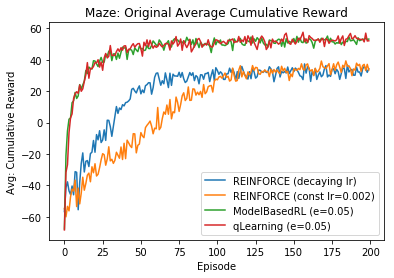

In [5]:
#generate data for 200 episodes over 100 trials
rlProblem_results = generate_data_for_plot(rlProblem)
plot_legend = rlProblem_results.pop(-1)
plot_title = "Maze: Original Average Cumulative Reward"
plot_avg_cumulative_reward(rlProblem_results, plot_legend, plot_title, 
                           None, use_ax_limit=False)

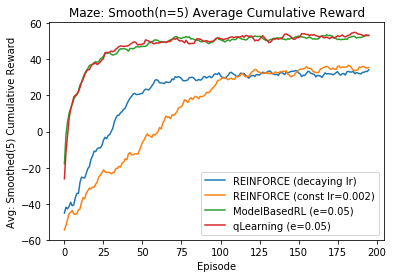

In [6]:
#plot smoothed curves
plot_title = "Maze: Smooth(n=5) Average Cumulative Reward"
plot_avg_cumulative_reward(rlProblem_results, plot_legend, plot_title, 
                           None, n=5, smooth=True, use_ax_limit=False)

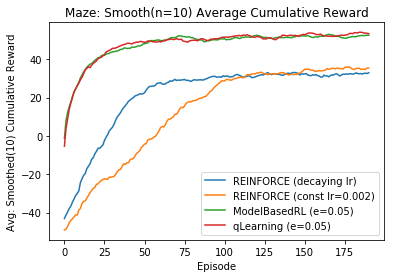

In [7]:
plot_title = "Maze: Smooth(n=10) Average Cumulative Reward"
plot_avg_cumulative_reward(rlProblem_results, plot_legend, plot_title, 
                           None, n=10, smooth=True, use_ax_limit=False)

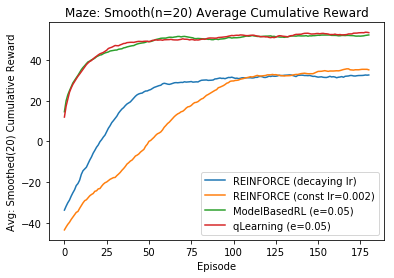

In [8]:
plot_title = "Maze: Smooth(n=20) Average Cumulative Reward"
plot_avg_cumulative_reward(rlProblem_results, plot_legend, plot_title, 
                           None, n=20, smooth=True, use_ax_limit=False)

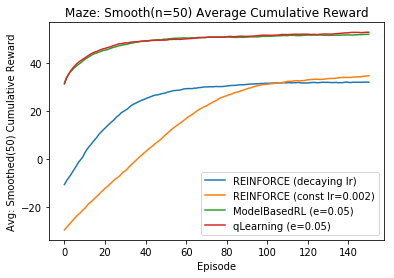

In [9]:
plot_title = "Maze: Smooth(n=50) Average Cumulative Reward"
plot_avg_cumulative_reward(rlProblem_results, plot_legend, plot_title, 
                           None, n=50, smooth=True, use_ax_limit=False)

The above graphs show the comparison of learning curve of REINFORCE w/ constant lr, REINFORCE w/ decaying lr, Model Based RL w/ $epsilon=0.05$ and Q-learning w/ $epsilon=0.05$. The first curve `Maze: Original Average Cumulative Reward` shows the actual curve obtained from running each algorithm for 100 trials for 200 episodes. The following curves are smoothed using a moving average with a window of size $n=5,10,20,50$.

We see that the cumulative reward for REINFORCE is the lowest and it performs the worst in the maze environment. I tried to use a constant learning rate and a decaying learning rate. The decaying learning rate started with a learning rate of $0.004$ and was decreased by $0.001$ after every 60 episodes. The constant learning rate curve used a learning rate of $0.002$. The decaying learning rate shows a faster increase in the cumulative reward results, however the constant learning rate keeps increasing the cumulative reward and ends up with a better final return than decaying cumulative reward. This can be attributed to the fact that the small learning rate gives small steps in the right direction. In `lr-evaluation` file we see that using a learning $0.001$ shows constant improvements, but performs worse in 200 episode time frame. If we use a larger timeframe with a constantly decaying learning rate, theoretically: REINFORCE should be able to achieve the same results as the Q-learning and model based techniques.

The Model Based RL is running value iteration under the covers. However, value iteration needs the transition matrix of the environment to be known, the samples from the environment are used to update the probability of visiting states; given current state and action. This estimate of transition matrix is used to generate the value function of the environment and thus extract a policy. The better policy is then used to generate more samples of the environment, thus updating the transition matrix again. This helps improve the convergence of the value function. The model based RL algorithm shows great results as it is able to generate a good model of the environment in a few number of episodes and use it create the best value function estimations.

The Q-learning algorithm shows the best results (nearly identical to Model based RL). The Q-learning uses a single estimate to update the Q-value function. The update is step-wise and helps reduce the uncertainity of the value of (state,action) pair over time. Both model based RL and Q-learning algorithms generate an estimate of the value function in a fully visible MDP and are thus able to generate an optimal policy very quickly.

#### Question:  Discuss how different properties of each algorithm influence the cumulative rewards per episode earned during training as well as the resulting.
The REINFORCE algorithm is a optimization algorithm which tries to optimize the stochastic policy based on the stochastic gradient policy theorem. The updates are based on the gradient of the policy (w.r.t policy parameters) and point towards the direction of steepest incline. The optimization techinique is used to update the policy parameters towards the direction of accent. The actions which generate a positive $G_n$ produce imply that they are good actions in that state and thus we increase their probability and reduce the probability of other actions in that state. This numerical optimization is quite slow and requires a large number of episodes to converge. The policy parameters only get a small update in the direction of the gradient. To increase the convergence rate we could use a better optimizer like `Adam` to improve the convergence results. However, the model based RL technique directly tries to find the model of the environment, and then perform deterministic algorithm of value iteration on it; it is able to generate better results as the model of the environment improves (each step of each episode). The same is true for Q-learning as we generate a new sample from the environment and use it to update the estimate of the Q-function. The update is based on direct value function estimates from the previous time-step and mimic the formula of an expectation (if $\gamma=1$). This results in deterministic updates to the value function as compared to the REINFORCE algorithm which uses a non-linear function approximator to guide the approximator towards the correct direction of optimal solution. The REINFORCE algorithm also directly optimizes the policy rather than the value function; and could directly improve from the knowledge from value function approximation (like we see in Actor Critic). The $G_n$ estimates also induce high variance in the results as they are not normalized.

This might not have been the perfect environment to see the benefits of policy gradient methods as the policy gradient methods work better in environments where we have imperfect information of the world and thus need a stochastic policy to maintain a certain probabilitiy of taking less popular actions (based on how much we know about the environment). In Maze environment the action-value functions is simpler to approximate and thus we get better results using the Q-learning and model based RL method.